
# 1. Project Objectives 

## 1.1 Introduction

In this exploration, our focus is directed towards understanding the impact of environmental conditions on bike rentals. Recognising the dynamic nature of our business, where outdoor activities are heavily influenced by the prevailing weather, we aim to uncover patterns, trends, and correlations that will enable us to make informed decisions and provide strategic recommendations.

## 1. Seasonal Trends
- Which season has the highest and lowest rental? 
- Are there specific seasons that exhibit a significant increase in casual or registered users?

## 2. Temperature Trends
- Are there any period within the year with higher rental?
- What is the association between temperature and bike rental counts?

## 3. Weather Impact
- How weather conditions affects the bike rental counts? 
 
## 4. User Behavior
- Do users have different preferences for renting bikes on weekdays compared to weekends? 
- How does bike rental behavior change on working days compared to non-working days?



# 2. Data Preparation

The `BikeSharing Dataset.csv` contains 184 entries. Appropriate libraries were imported and a backup of the dataset was made. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BikeSharing Dataset.csv')
df_bkup = df.copy()
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


## 2.1 Identifying Missing Values

df.isnull().any() was used to check for any null values in the data set. No null value was indentified when the method was utilised. 

In [2]:
df.isnull().any()


instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

## 2.2 Converting Categorical Data

Categeorical data is converted from numerical format to texual format for better visualiastion.

In [3]:
mapper = { 
    0: "Monday",
    1: "Tuesday",
    2: "Wednesday",
    3: "Thursday",
    4: "Friday",
    5: "Saturday",
    6: "Sunday",
    
}

In [4]:
df["weekday_name"] = df["weekday"].map(mapper)
df["weekday_name"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [5]:
mapper = {
    0: "2011",
    1: "2012"    
}

In [6]:
df["yr_name"] = df["yr"].map(mapper)
df["yr_name"].unique()


array(['2011', '2012'], dtype=object)

In [7]:
mapper = {
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"    
}

In [8]:
df["season_name"] = df["season"].map(mapper)
df["season_name"].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

In [9]:
mapper = {
    1: "Jan",
    2: "Feb",
    3: "Mar",
    4: "Apr",
    5: "May",
    6: "Jun",
    7: "Jul",
    8: "Aug",
    9: "Sep",
    10: "Oct",
    11: "Nov",
    12: "Dec"
}

In [10]:
df["mnth_name"] = df["mnth"].map(mapper)
df["mnth_name"].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [11]:
mapper = {
    0: "Non-working day",
    1: "Working day" 
}

In [12]:
df["workingday_name"] = df["workingday"].map(mapper)
df["workingday_name"].unique()

array(['Non-working day', 'Working day'], dtype=object)

In [13]:
mapper = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

In [14]:
df["weathersit_name"] = df["weathersit"].map(mapper)
df["weathersit_name"].unique()

array(['Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'Clear, Few clouds, Partly cloudy, Partly cloudy',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain'],
      dtype=object)

# 3. Visualisation

## 3.1. Seasonal Trends

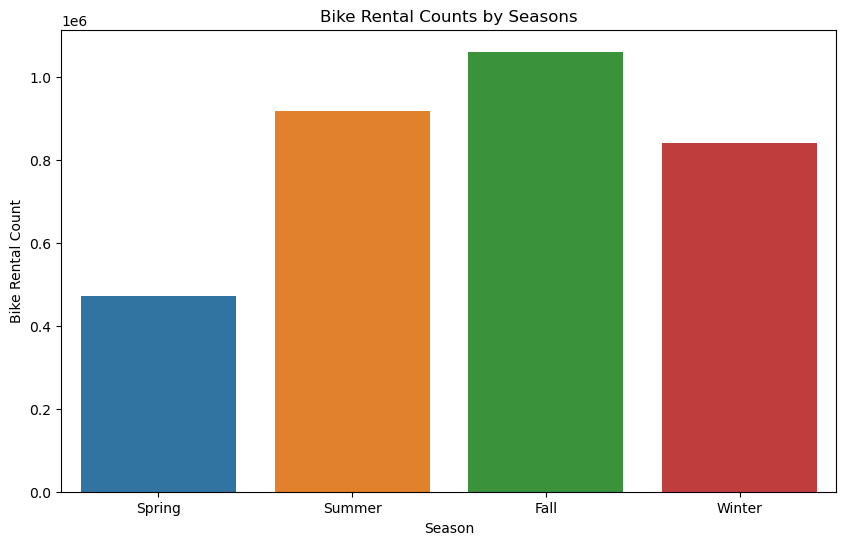

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='cnt', data=df, estimator=sum, errorbar=None)
plt.title("Bike Rental Counts by Seasons")
plt.xlabel("Season")
plt.ylabel("Bike Rental Count")

plt.show()

### 3.1.1  Which season has the highest and lowest rental? 

Bar charts are generated to provide summary of bike rental counts categorised by seasons. The fall season records the highest bike rental count while counts are notably lower during spring compared to the other seasons.

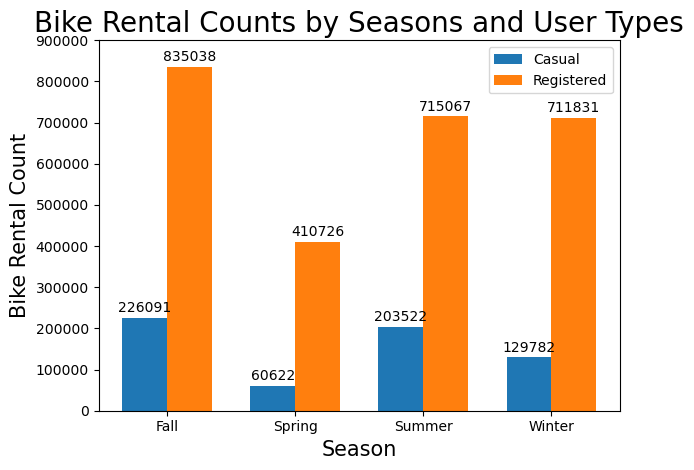

In [16]:
# Perform the aggregation
casual = df.groupby('season_name')['casual'].sum()
registered = df.groupby('season_name')['registered'].sum()
x_labels = registered.index

# Set the label locations and width of the bars
x = np.arange(len(x_labels))  
width = 0.35

# Create a figure and subplot
fig, ax = plt.subplots() 

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, casual, width, label='Casual')  # Bar on the left
bar2 = ax.bar(x + width/2, registered, width, label='Registered')  # Bar on the right

# Customize the plot
ax.set_title('Bike Rental Counts by Seasons and User Types', fontsize=20)
ax.set_ylabel('Bike Rental Count', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.set_xlabel('Season', fontsize=15)
ax.set_ylim(bottom=0, top=900000)  # Adjusted the y-axis limit
ax.legend()

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

### 3.1.2 Are there specific seasons that exhibit a significant increase in casual or registered users?  

A grouped bar chart has been generated to examine the bike rental counts between casual and registered users across all seasons. The analysis reveals a notable disparity in rental counts, with registered users consistently having significantly higher counts compared to casual users. The counts of casual and registered users remain consistent with the previous analysis conducted for each individual season.


## 3.2 Temperature Trends


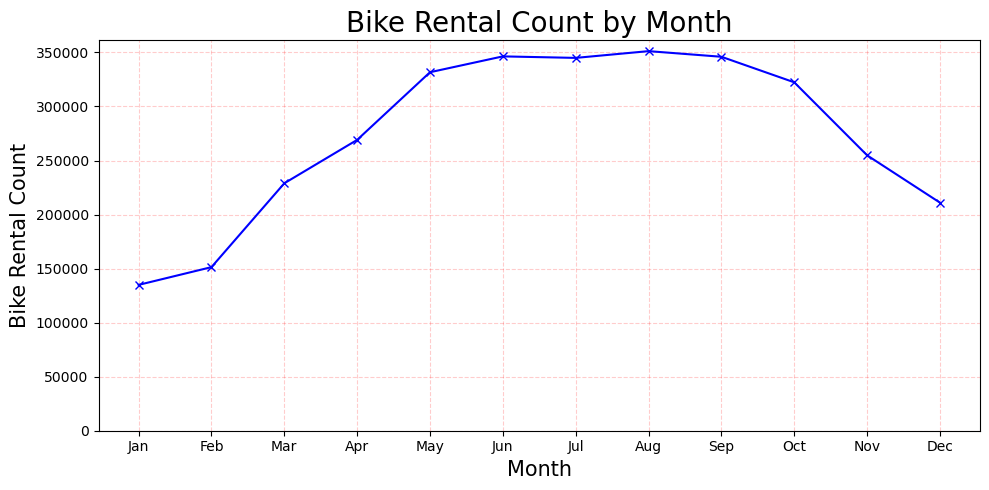

In [17]:
# Define the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'mnth_name' to a categorical data type with the correct order
df['mnth_name'] = pd.Categorical(df['mnth_name'], categories=month_order, ordered=True)

# Sort DataFrame by the 'mnth_name' column
df = df.sort_values('mnth_name')

# Perform the aggregation
cnt1 = df.groupby('mnth_name')['cnt'].sum()

# Create a figure and subplot with 1 row and 1 column, set figure size to 10 by 5
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Create one plot containing line charts for revenue and profits (remember to set legend labels)
axes.plot(month_order, cnt1, 'b-x', label='Month')

# Set appropriate title for plot (set font size to 20))
axes.set_title('Bike Rental Count by Month', fontsize=20)

# Set labels for x-axis and y-axis (set font size to 15)
axes.set_xlabel('Month', fontsize=15)
axes.set_ylabel('Bike Rental Count', fontsize=15)

# Set font size of ticks on the x-axis and y-axis to 10 [one single code option]
axes.tick_params(axis='both', labelsize=10)

# Set appropriate ranges for the x-axis and y-axis
axes.set_ylim(bottom=0, top=cnt1.max() + 10000)  # Adjusted top value to accommodate data

# Set grid lines to red, 0.2 transparency and dashed linestyle
axes.grid(c='r', alpha=0.2, linestyle='--')

# Remove the legend entry for 'Revenue'
axes.legend().set_visible(False)

# Set tight layout for figure
fig.tight_layout()

# Display the plot
plt.show()


### 3.2.1 Are there any period within the year with higher rental?

A line chart has been generated to examine the bike rental count by month. The period from May to September, which corresponds to the warmer months, exhibits higher bike rentals.

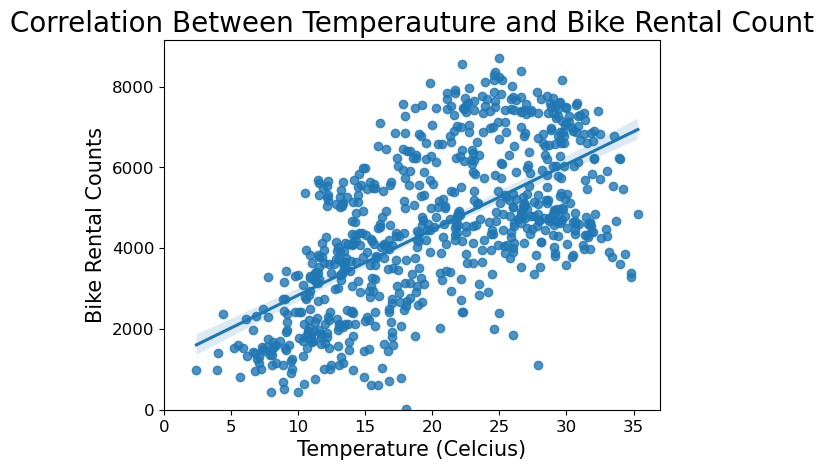

In [18]:
# Plot using Seaborn
sns.regplot(x='temp', y='cnt', data=df)
 
# Tweak x-axis and y-axis ranges using Matplotlib
plt.title('Correlation Between Temperauture and Bike Rental Count', fontsize=20)
plt.xlabel('Temperature (Celcius)', fontsize=15)
plt.ylabel('Bike Rental Counts', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, None)
plt.xlim(0, None)

# Display the plot
plt.show()

### 3.2.2 What is the association between temperature and bike rental counts? 

A scatter plot is created to examine the relationship between temperature and bike rental count. A positive correlation exists between temperature and bike rental count, suggesting that a higher temperature may attract more customers who prefer to rent bikes. 

## 3.3 Weather Impact


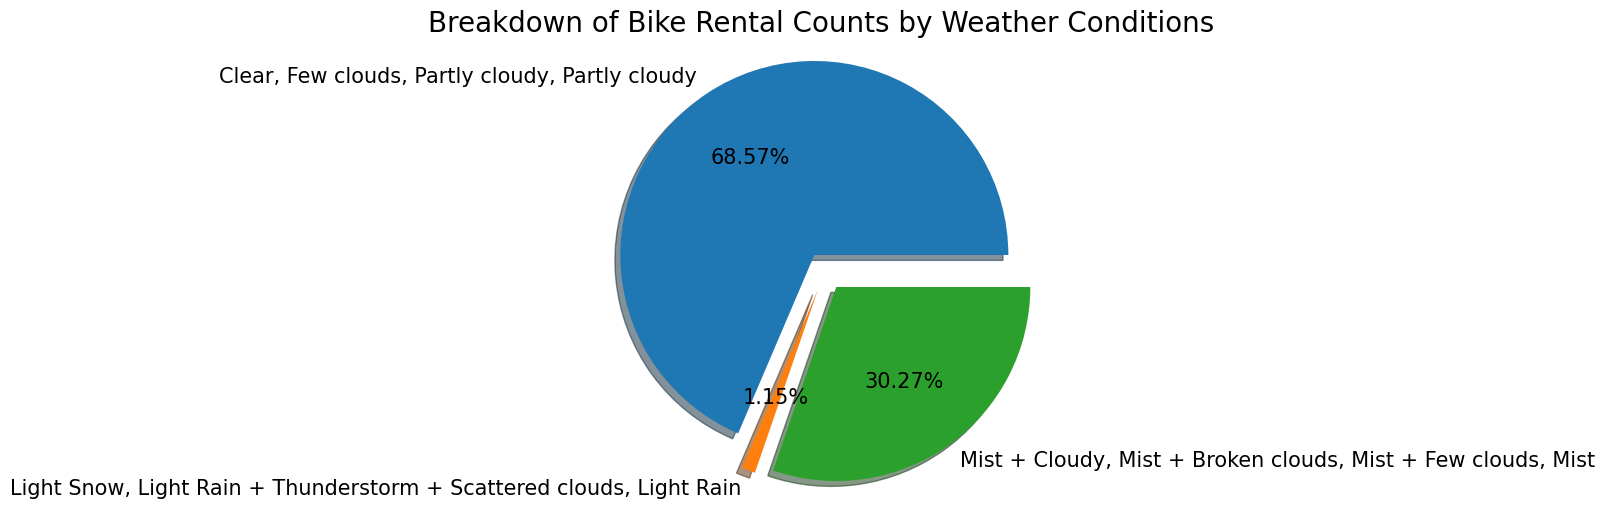

In [19]:
# Enter your code here:
 
# Define data values and labels for pie chart
cnt = df.groupby('weathersit_name')['cnt'].sum()
seasons = cnt.index
 
# Create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6))
 
# Plot pie chart
ax.pie(cnt, labels=seasons, explode = (0.1,0.1,0.1), autopct='%1.2f%%', textprops={'fontsize': 15}, shadow=True)
 
# Set equal aspect ratio to ensure that pie is drawn as a circle
ax.axis('equal')  
 
# Set title
ax.set_title('Breakdown of Bike Rental Counts by Weather Conditions ', fontsize=20)
 
# Display plot
plt.show()

### 3.3.1 How weather conditions affects the bike rental counts?

A pie chart is created to examine the breakdown of bike rental counts by weather conditions. It is evident that when there is no rain, the percentage of bike rental counts is noticeably higher and the highest percentage is observed on clear days.

## 3.4. User Behavior


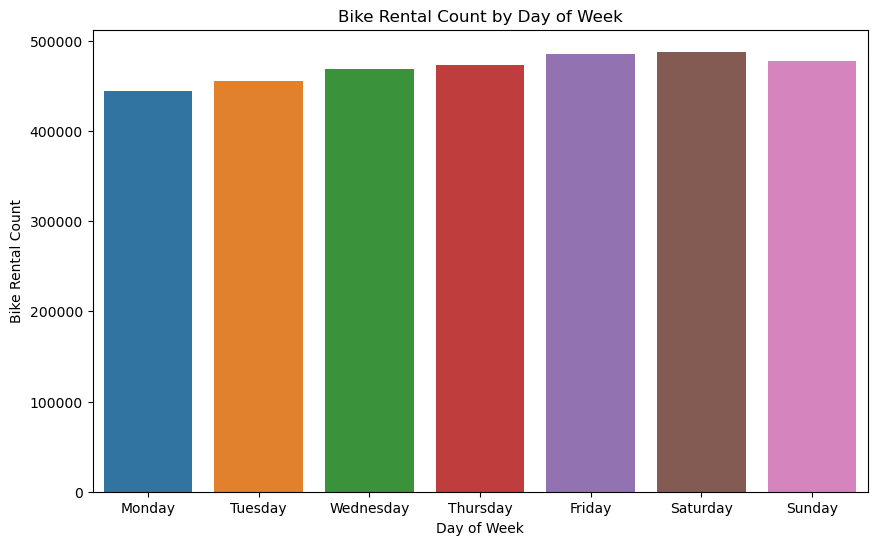

In [20]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday_name', y='cnt', data=df, estimator=sum, order=order, errorbar=None)
plt.title("Bike Rental Count by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Bike Rental Count")

plt.show()

### 3.4.1 Do users have different preferences for renting bikes on weekdays compared to weekends? 

Bar charts are generated to provide summary of bike rental count categorised by day of week. There is no significant difference in the bike rental counts between weekdays and weekends. Interestingly, the highest bike rental counts are observed on weekdays.

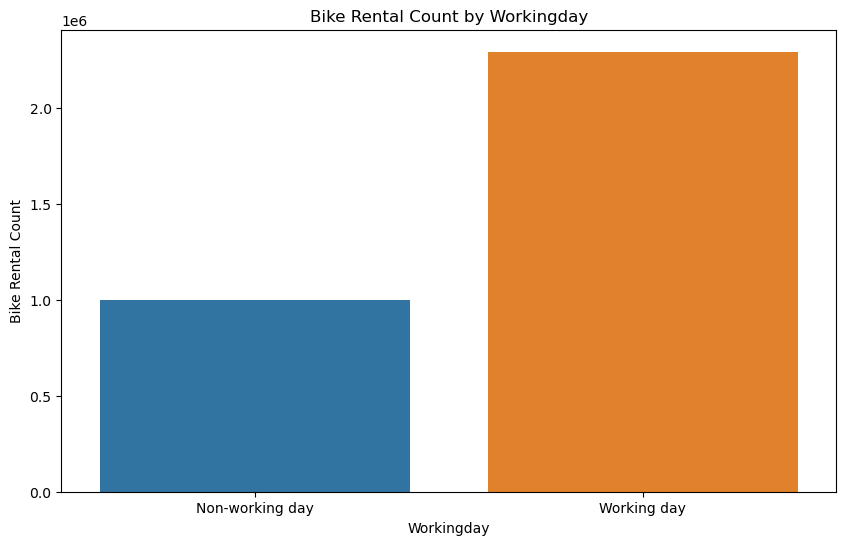

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday_name', y='cnt', data=df, estimator=sum, errorbar=None)
plt.title("Bike Rental Count by Workingday")
plt.xlabel("Workingday")
plt.ylabel("Bike Rental Count")

plt.show()

### 3.4.2 How does bike rental behavior change on working days compared to non-working days?

Bar charts are created to offer a summary of bike rental count categorised by working day. It is noted that bike rental counts are higher on working days compared to non-working days.

# 4. Dashboard

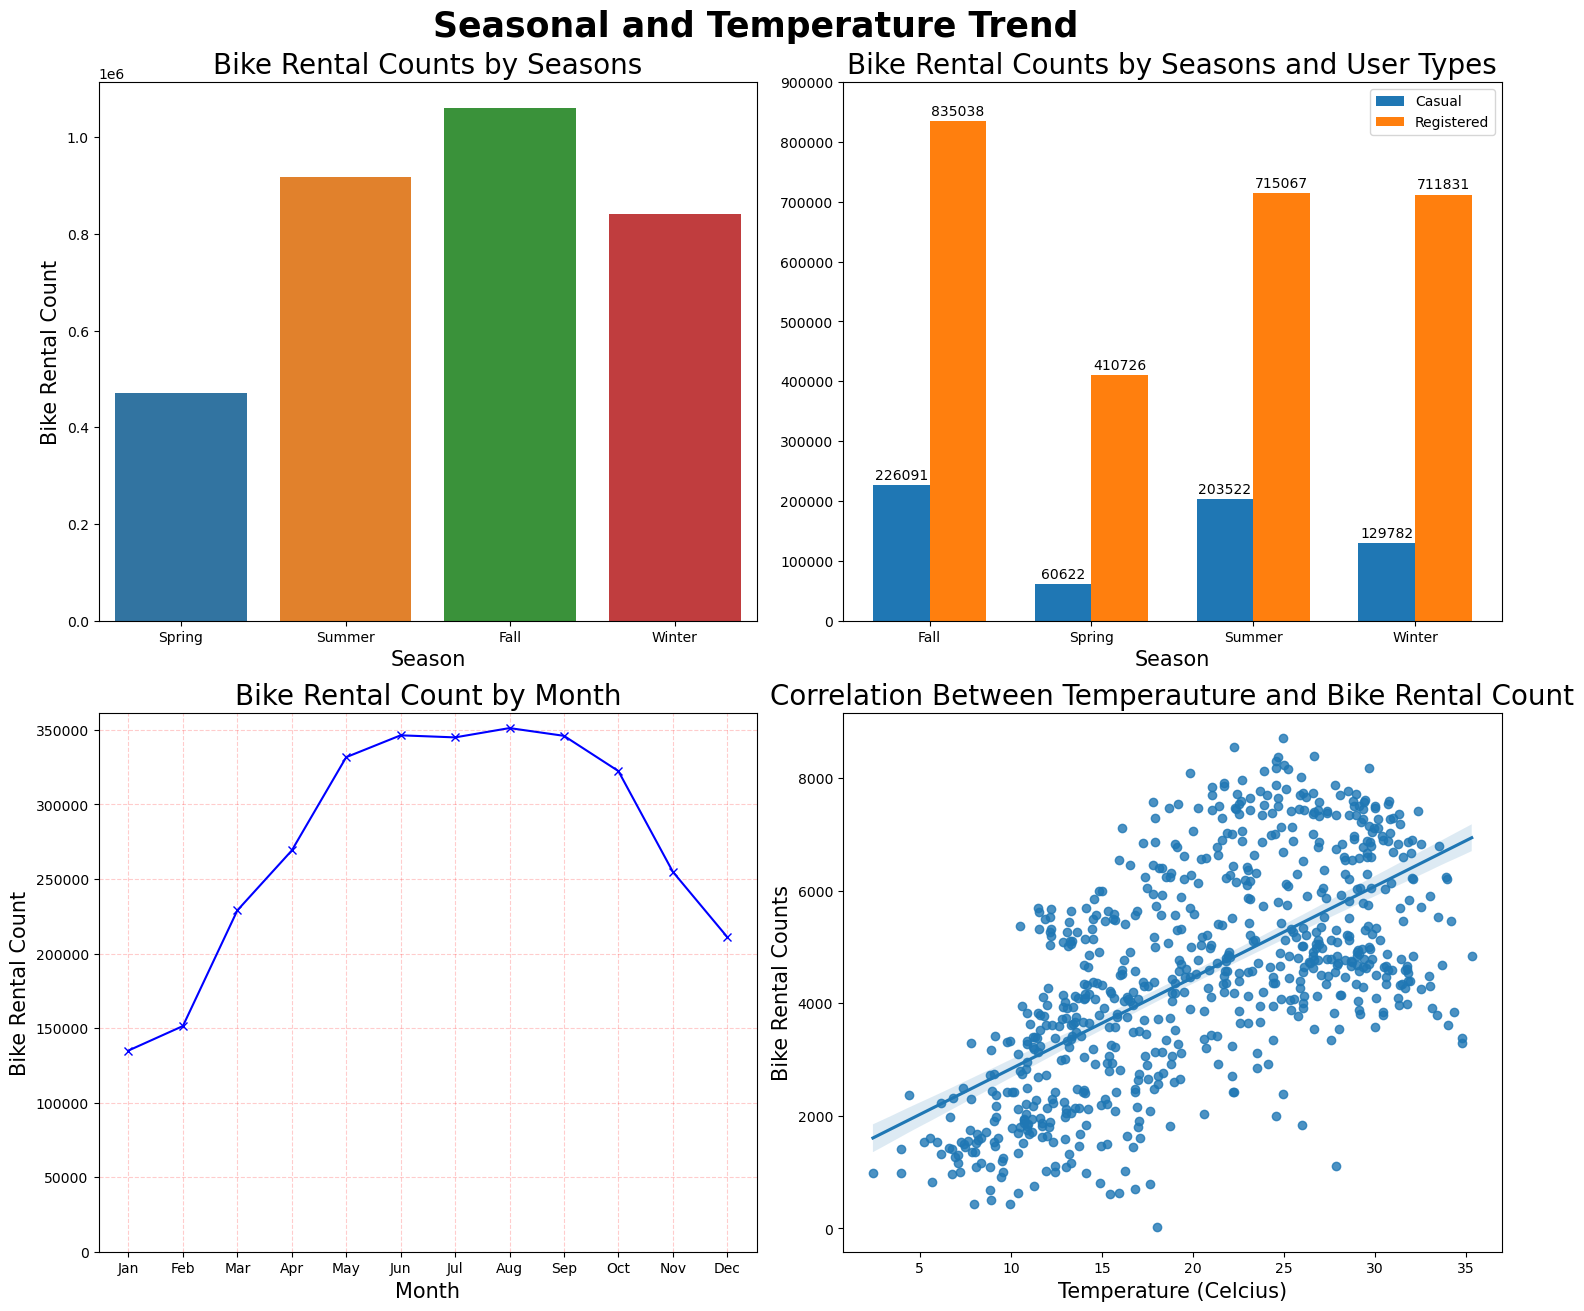

In [22]:
# import GridSpec package from matplotlib
from matplotlib.gridspec import GridSpec

# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(15,13), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=2, figure=fig)


# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# Plot the first graph
sns.barplot(x='season_name', y='cnt', data=df, estimator=sum, errorbar=None, ax=ax1)
ax1.set_title("Bike Rental Counts by Seasons", fontsize=20)
ax1.set_xlabel("Season", fontsize=15)
ax1.set_ylabel("Bike Rental Count", fontsize=15)

# Plot the second graph
bar1 = ax2.bar(x - width/2, casual, width, label='Casual')  # Bar on the left
bar2 = ax2.bar(x + width/2, registered, width, label='Registered')  # Bar on the right
ax2.set_title('Bike Rental Counts by Seasons and User Types', fontsize=20)
ax.set_ylabel('Bike Rental Count', fontsize=15)
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels)
ax2.set_xlabel('Season', fontsize=15)
ax2.set_ylim(bottom=0, top=900000)  # Adjusted the y-axis limit
ax2.legend()
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)

# Plot the third graph
ax3.plot(month_order, cnt1, 'b-x', label='Month')
ax3.set_title('Bike Rental Count by Month', fontsize=20)
ax3.set_xlabel('Month', fontsize=15)
ax3.set_ylabel('Bike Rental Count', fontsize=15)
ax3.tick_params(axis='both', labelsize=10)
ax3.set_ylim(bottom=0, top=cnt1.max() + 10000)  # Adjusted top value to accommodate data
ax3.grid(c='r', alpha=0.2, linestyle='--')
ax3.legend().set_visible(False)

# Plot the fourth  graph
sns.regplot(x='temp', y='cnt', data=df, ax=ax4)
ax4.set_title('Correlation Between Temperauture and Bike Rental Count', fontsize=20)
ax4.set_xlabel('Temperature (Celcius)', fontsize=15)
ax4.set_ylabel('Bike Rental Counts', fontsize=15)

# Set the title of the dashboard
fig.suptitle('Seasonal and Temperature Trend', fontsize=25, fontweight='bold')

# Display the dashboard
plt.show()


The fall season observes the highest bike rental count while counts during spring are significantly lower compared to the other seasons. When we further categorised into the type of users, registered users consistently display significantly higher counts compared to casual users for each season. The counts for both registered and casual users continue to exhibit consistency in line with the analysis conducted for each individual season. One potential explanation for the reduced bike rental counts in spring could be related to seasonal allergies such as hayfever. Additional investigation is warranted to explore ways to increase rental counts during the spring season.

During the months from May to September corresponding to the warmer season, there is an increase in bike rentals. There is also a positive correlation between temperature and bike rental count, indicating that higher temperatures may attract more customers who choose to rent bikes. Furthermore, a consistent trend is observed when comparing the line chart with the individual seasonal bar chart. Based on this analysis, it might be beneficial to consider offering more discounts during months and seasons with lower sales to boost bike rental counts.

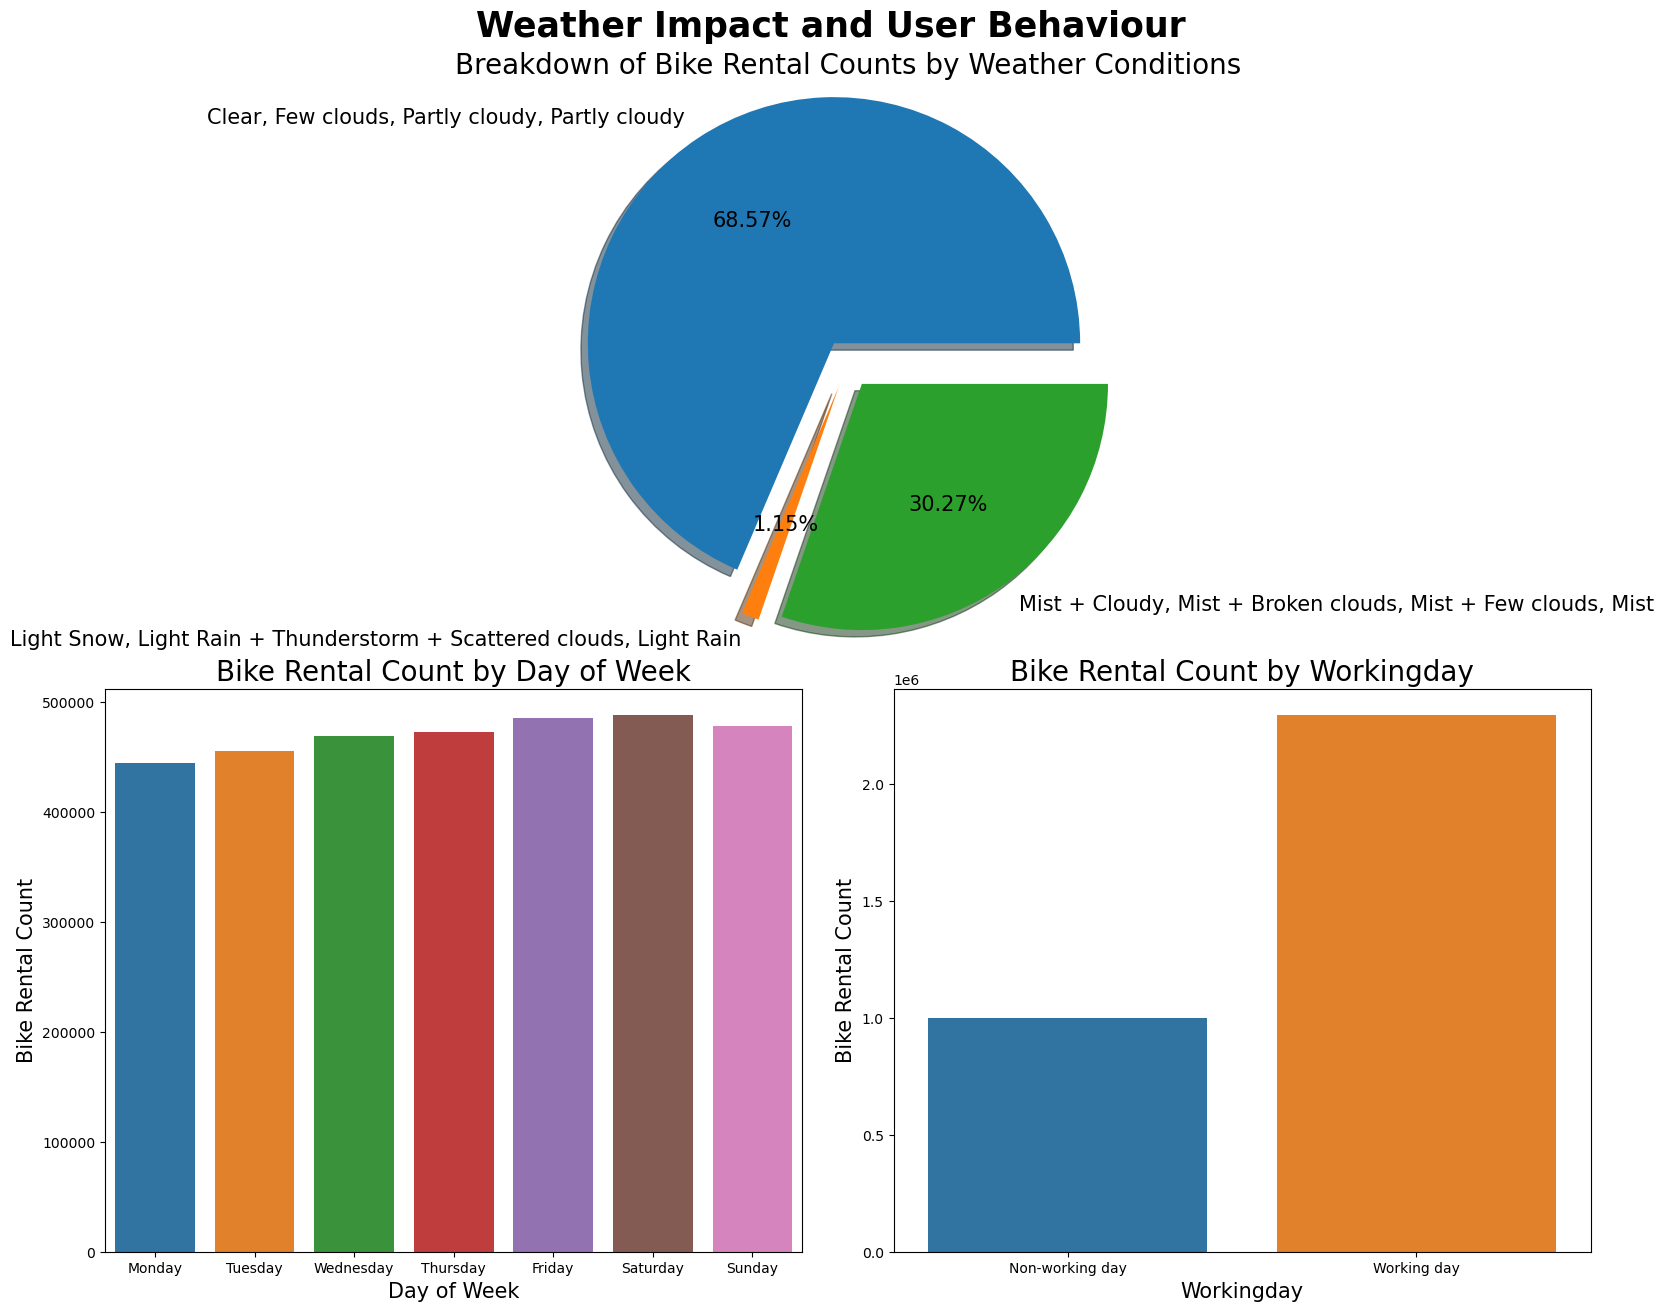

In [23]:
# import GridSpec package from matplotlib
from matplotlib.gridspec import GridSpec

# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(17,13), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=2, ncols=2, figure=fig)


# Define subplots and their corresponding positions
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Plot the first graph
ax1.pie(cnt, labels=seasons, explode = (0.1,0.1,0.1), autopct='%1.2f%%', textprops={'fontsize': 15}, shadow=True)
ax1.axis('equal')  
ax1.set_title('Breakdown of Bike Rental Counts by Weather Conditions', fontsize=20)

# Plot the second graph
sns.barplot(x='weekday_name', y='cnt', data=df, estimator=sum, order=order, errorbar=None, ax=ax2)
ax2.set_title("Bike Rental Count by Day of Week", fontsize=20)
ax2.set_xlabel("Day of Week", fontsize=15)
ax2.set_ylabel("Bike Rental Count", fontsize=15)

# Plot the third graph
sns.barplot(x='workingday_name', y='cnt', data=df, estimator=sum, errorbar=None, ax=ax3)
ax3.set_title("Bike Rental Count by Workingday", fontsize=20)
ax3.set_xlabel("Workingday", fontsize=15)
ax3.set_ylabel("Bike Rental Count", fontsize=15)

# Set the title of the dashboard
fig.suptitle('Weather Impact and User Behaviour', fontsize=25,fontweight='bold')

# Display the dashboard
plt.show()


It is clear that on rain-free days, the percentage of bike rental counts is significantly higher and the highest percentage is observed on clear days. To boost bike rental counts during rainy weather, we may explore strategies such as offering special discounts or packages on rainy days and providing complimentary rain gear or selling rain ponchos at rental locations for added convenience.

There is no notable difference in bike rental counts between weekdays and weekends. However, intriguingly, it is noted that bike rental counts show higher figures on working day in comparison to non-working days. Based on this observation, it is possible that more individuals rent bicycles for commuting due to the rising cost of transportation for daily commutes. Non-working days typically involve leisure and promoting specific leisure activities could enhance bike rental during these periods.